In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import os



In [29]:
# Load and preprocess data
data = tf.keras.utils.image_dataset_from_directory(u'ImageSet')
data = data.map(lambda x, y: (x / 255, y))



Found 3276 files belonging to 4 classes.


In [31]:
# Split the dataset
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)



In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
# Define the model
model = Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4,activation='softmax'))


In [34]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [35]:
# Train the model
history = model.fit(train, epochs=15, validation_data=val)



Epoch 1/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 62s 824ms/step - accuracy: 0.3672 - loss: 1.5162 - val_accuracy: 0.5437 - val_loss: 1.0647
Epoch 2/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 51s 703ms/step - accuracy: 0.5559 - loss: 1.0363 - val_accuracy: 0.5641 - val_loss: 1.0372
Epoch 3/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 52s 718ms/step - accuracy: 0.6472 - loss: 0.8540 - val_accuracy: 0.6422 - val_loss: 0.8835
Epoch 4/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 49s 675ms/step - accuracy: 0.7524 - loss: 0.6448 - val_accuracy: 0.6875 - val_loss: 0.8014
Epoch 5/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 51s 705ms/step - accuracy: 0.8304 - loss: 0.4568 - val_accuracy: 0.7016 - val_loss: 0.7503
Epoch 6/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 52s 716ms/step - accuracy: 0.9161 - loss: 0.2612 - val_accuracy: 0.7250 - val_loss: 0.8869
Epoch 7/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 50s 692ms/step - accuracy: 0.9666 - loss: 0.1340 - val_accuracy: 0.7531 - val_loss: 0.9261
Epoch 8/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 49s 677ms/step - accuracy: 0.9810 - loss: 0.0786 - val_accu

In [36]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')



10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.6846 - loss: 1.9953
Test Loss: 2.3625340461730957, Test Accuracy: 0.653124988079071


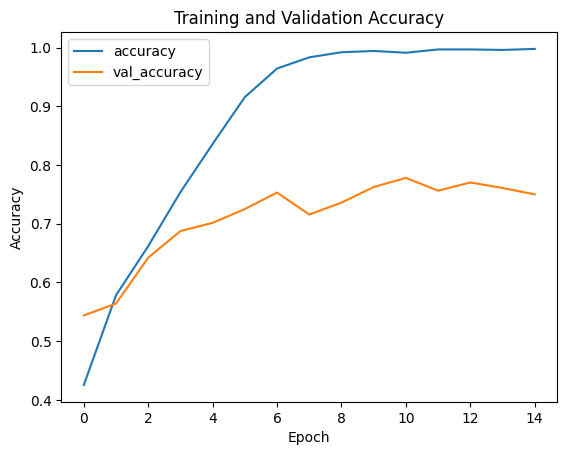

In [37]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



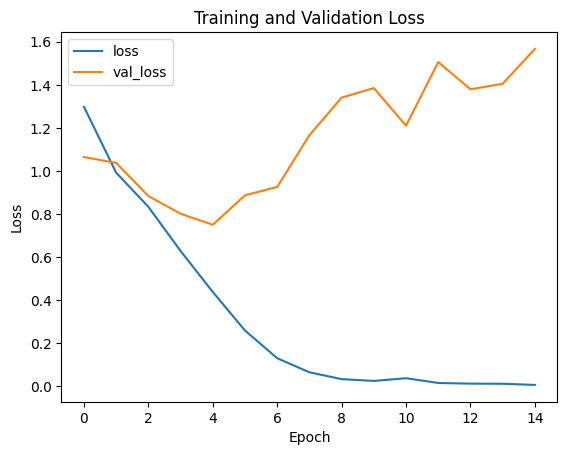

In [38]:
# Plot training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
# Save the model
model.save('final_model.h5')
print("Model saved.")

Model saved.


In [12]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,092,190 (42.31 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,394,794 (28.21 MB)

In [40]:
def get_class(prediction):
    classes = ["Bus", "Car", "Motorcycle", "Truck"]
    return classes[np.argmax(prediction)]

In [41]:
import cv2
import os
import numpy as np

img = cv2.imread('bus.png')
resize = tf.image.resize(img, (256, 256))
np.expand_dims(resize, 0)
prediction = model.predict(np.expand_dims(resize / 255, 0))

object_class = get_class(prediction[0])
confidence = np.max(prediction)

print(f"Predicted Object: {object_class}, Confidence: {confidence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Object: Car, Confidence: 0.9972769618034363


In [51]:
import os
import numpy as np
import cv2
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))  # Assuming your model expects input size of 256x256
    image = image.astype('float32') / 255  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

test_image_folder = 'test_images'

class_labels = ['Bus', 'Car', 'Motorcycle', 'Truck'] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

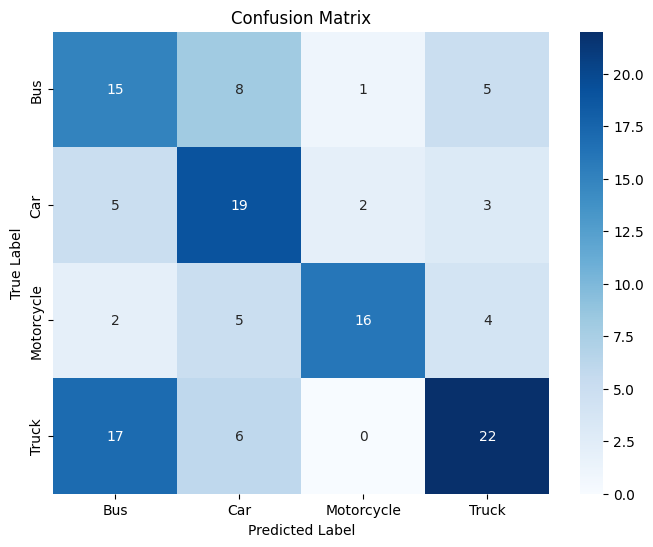

Class: Bus
Accuracy: 0.52
Recall: 0.52
F1 Score: 0.68

Class: Car
Accuracy: 0.66
Recall: 0.66
F1 Score: 0.79

Class: Motorcycle
Accuracy: 0.59
Recall: 0.59
F1 Score: 0.74

Class: Truck
Accuracy: 0.49
Recall: 0.49
F1 Score: 0.66

Overall Metrics:
Overall Accuracy: 0.55
Overall Precision: 0.60
Overall Recall: 0.55
Overall F1 Score: 0.56


In [52]:
precision_per_class = {}
accuracy_per_class = {}
recall_per_class = {}
f1_per_class = {}
predictions_all = []
ground_truth_all = []

for class_name in class_labels:
    class_folder = os.path.join(test_image_folder, class_name)
    test_images = os.listdir(class_folder)

    predictions_class = []
    ground_truth_class = [class_name] * len(test_images) 

    for image_name in test_images:
        image_path = os.path.join(class_folder, image_name)
        preprocessed_image = preprocess_image(image_path)
        predictions = model.predict(preprocessed_image)
        predicted_class = class_labels[np.argmax(predictions)]
        predictions_all.append(predicted_class)
        ground_truth_all.append(class_name)
        predictions_class.append(predicted_class)
    
    accuracy_per_class[class_name] = accuracy_score(ground_truth_class, predictions_class)
    precision_per_class[class_name] = precision_score(ground_truth_class, predictions_class, average='weighted', zero_division=1)
    recall_per_class[class_name] = recall_score(ground_truth_class, predictions_class, average='weighted', zero_division=1)
    f1_per_class[class_name] = f1_score(ground_truth_class, predictions_class, average='weighted', zero_division=1)

overall_accuracy = accuracy_score(ground_truth_all, predictions_all)
overall_precision = precision_score(ground_truth_all, predictions_all, average='weighted', zero_division=1)
overall_recall = recall_score(ground_truth_all, predictions_all, average='weighted', zero_division=1)
overall_f1 = f1_score(ground_truth_all, predictions_all, average='weighted', zero_division=1)

conf_matrix = confusion_matrix(ground_truth_all, predictions_all)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

for class_name in class_labels:
    print(f"Class: {class_name}")
    print(f"Accuracy: {accuracy_per_class[class_name]:.2f}")
    print(f"Recall: {recall_per_class[class_name]:.2f}")
    print(f"F1 Score: {f1_per_class[class_name]:.2f}")
    print()

print("Overall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.2f}")
print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall Recall: {overall_recall:.2f}")
print(f"Overall F1 Score: {overall_f1:.2f}")